# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

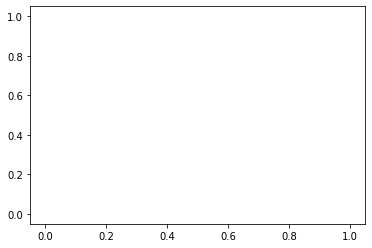

In [2]:
plt.plot();

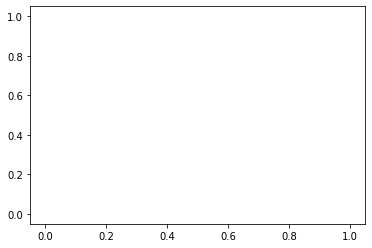

In [3]:
plt.plot()
plt.show()

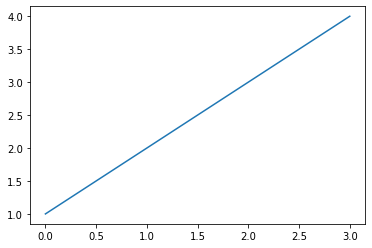

In [4]:
plt.plot([1,2,3,4]);

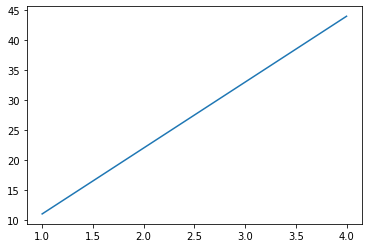

In [5]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y);

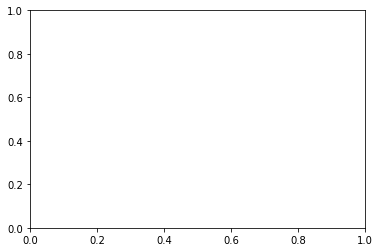

In [6]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

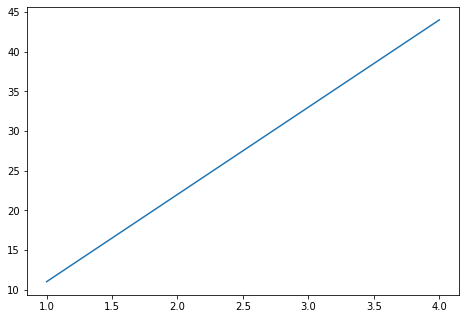

In [7]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

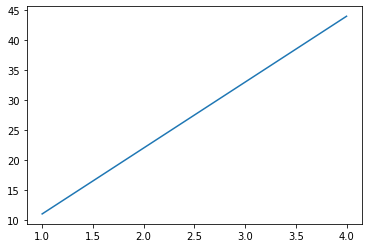

In [8]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add some data
type(fig), type(ax)

## Matplotlib example workflow

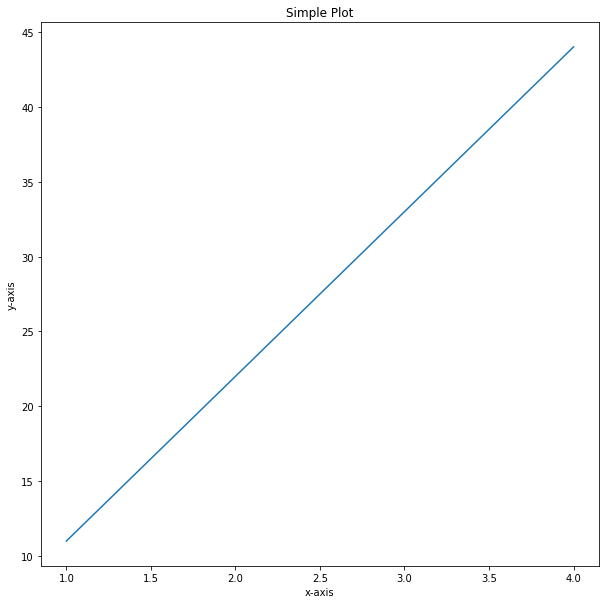

In [9]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save and show
fig.savefig("images/sample-plot.png")

## Making figures with NumPy Arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
*Subplot

In [10]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

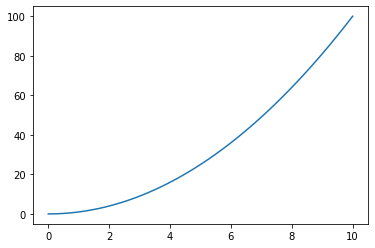

In [11]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

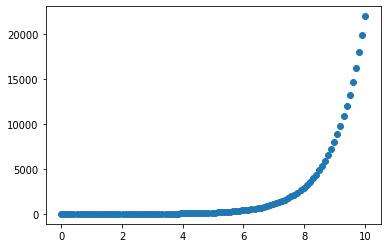

In [12]:
# Use the same data to make a Scatter plot 
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

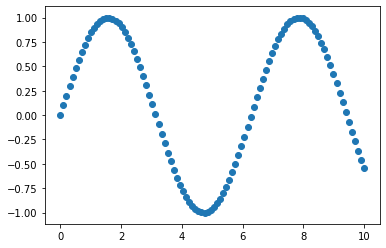

In [13]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

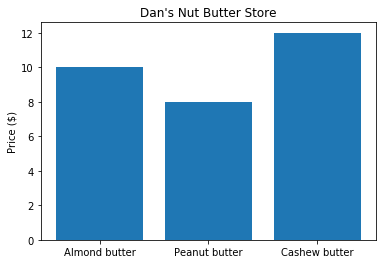

In [14]:
# Make a bar  plot from a dictionary
nut_butter_prices = {
    "Almond butter": 10,
    "Peanut butter": 8,
    "Cashew butter": 12
}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

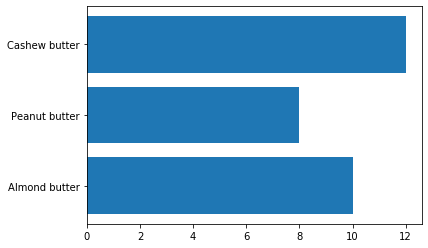

In [15]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

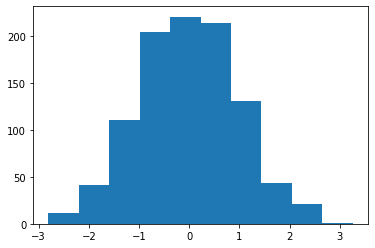

In [16]:
# Make some (random distribution) data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

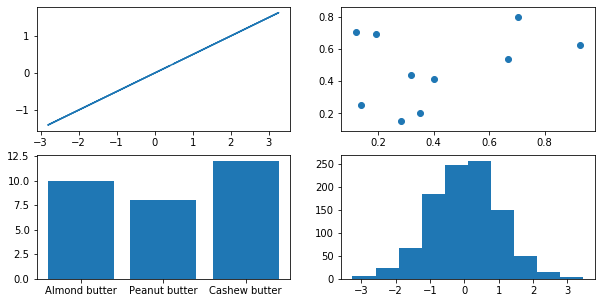

In [17]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2, 
                                             figsize=(10, 5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

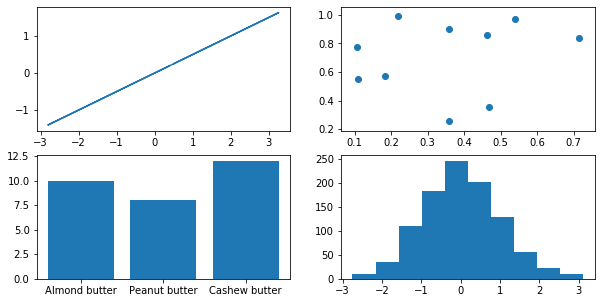

In [18]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))

# Plot to each different index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas dataframes

In [19]:
import pandas as pd

In [20]:
# Make a dataframe
car_sales = pd.read_csv("car_sales_dataframe.csv")
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,"$4,000.00"
1,1,Honda,Red,87899,4,"$5,000.00"
2,2,Toyota,Blue,32549,3,"$7,000.00"
3,3,BMW,Black,11179,5,"$22,000.00"
4,4,Nissan,White,213095,4,"$3,500.00"
5,5,Toyota,Green,99213,4,"$4,500.00"
6,6,Honda,Blue,45698,4,"$7,500.00"
7,7,Honda,Blue,54738,4,"$7,000.00"
8,8,Toyota,White,60000,4,"$6,250.00"
9,9,Nissan,White,31600,4,"$9,700.00"


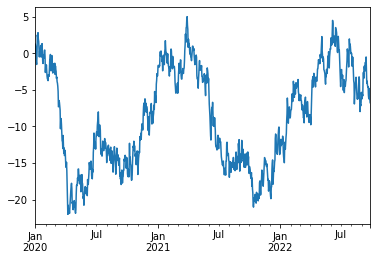

In [21]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot()

In [22]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$,\.]','')
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,400000
1,1,Honda,Red,87899,4,500000
2,2,Toyota,Blue,32549,3,700000
3,3,BMW,Black,11179,5,2200000
4,4,Nissan,White,213095,4,350000
5,5,Toyota,Green,99213,4,450000
6,6,Honda,Blue,45698,4,750000
7,7,Honda,Blue,54738,4,700000
8,8,Toyota,White,60000,4,625000
9,9,Nissan,White,31600,4,970000


In [23]:
type(car_sales["Price"][0])
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Toyota,White,150043,4,4000
1,1,Honda,Red,87899,4,5000
2,2,Toyota,Blue,32549,3,7000
3,3,BMW,Black,11179,5,22000
4,4,Nissan,White,213095,4,3500
5,5,Toyota,Green,99213,4,4500
6,6,Honda,Blue,45698,4,7500
7,7,Honda,Blue,54738,4,7000
8,8,Toyota,White,60000,4,6250
9,9,Nissan,White,31600,4,9700


In [24]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods = len(car_sales))
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,0,Toyota,White,150043,4,4000,2020-01-01
1,1,Honda,Red,87899,4,5000,2020-01-02
2,2,Toyota,Blue,32549,3,7000,2020-01-03
3,3,BMW,Black,11179,5,22000,2020-01-04
4,4,Nissan,White,213095,4,3500,2020-01-05
5,5,Toyota,Green,99213,4,4500,2020-01-06
6,6,Honda,Blue,45698,4,7500,2020-01-07
7,7,Honda,Blue,54738,4,7000,2020-01-08
8,8,Toyota,White,60000,4,6250,2020-01-09
9,9,Nissan,White,31600,4,9700,2020-01-10


In [25]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,0,Toyota,White,150043,4,4000,2020-01-01,4000
1,1,Honda,Red,87899,4,5000,2020-01-02,9000
2,2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,3,BMW,Black,11179,5,22000,2020-01-04,38000
4,4,Nissan,White,213095,4,3500,2020-01-05,41500
5,5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,8,Toyota,White,60000,4,6250,2020-01-09,66750
9,9,Nissan,White,31600,4,9700,2020-01-10,76450


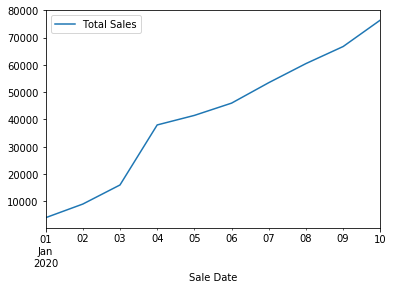

In [26]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

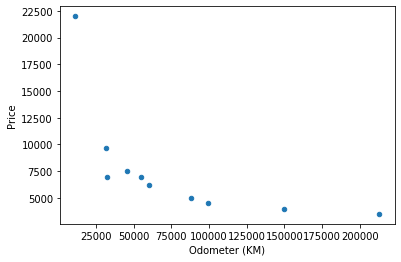

In [27]:
# Reassing price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [28]:
# BAR GRAPH
x = np.random.rand(10, 4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.692882,0.871350,0.896945,0.070404
1,0.084149,0.192150,0.514997,0.122464
2,0.680661,0.334861,0.491542,0.792118
3,0.928388,0.824345,0.102785,0.455030
4,0.189467,0.704348,0.546583,0.385163
5,0.485561,0.287411,0.700998,0.306414
6,0.045884,0.626921,0.984216,0.104538
7,0.873534,0.371544,0.203196,0.872758
8,0.583907,0.628984,0.663292,0.582385
9,0.290313,0.055619,0.585019,0.648608


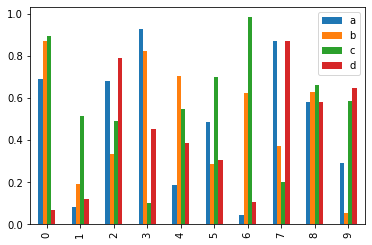

In [29]:
df.plot.bar();

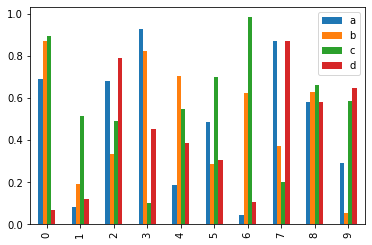

In [30]:
df.plot(kind="bar");

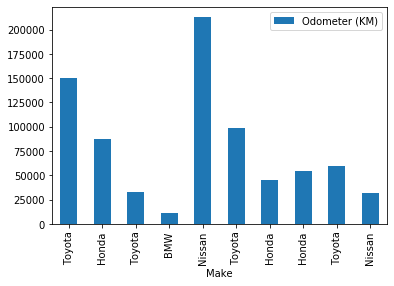

In [31]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

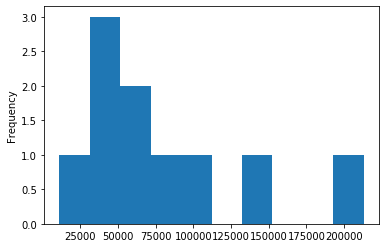

In [32]:
# HISTOGRAMS

car_sales["Odometer (KM)"].plot.hist();

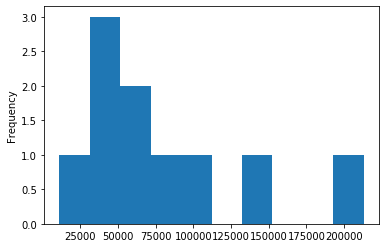

In [33]:
car_sales["Odometer (KM)"].plot(kind="hist");

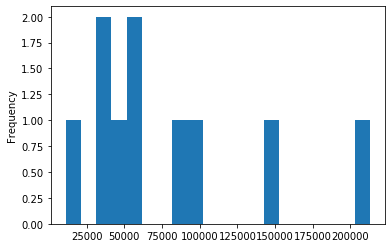

In [34]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [35]:
# Another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


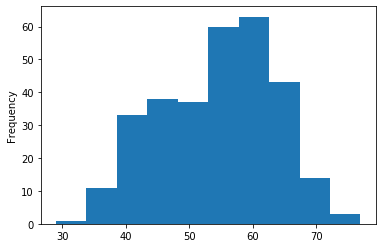

In [36]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins=10);

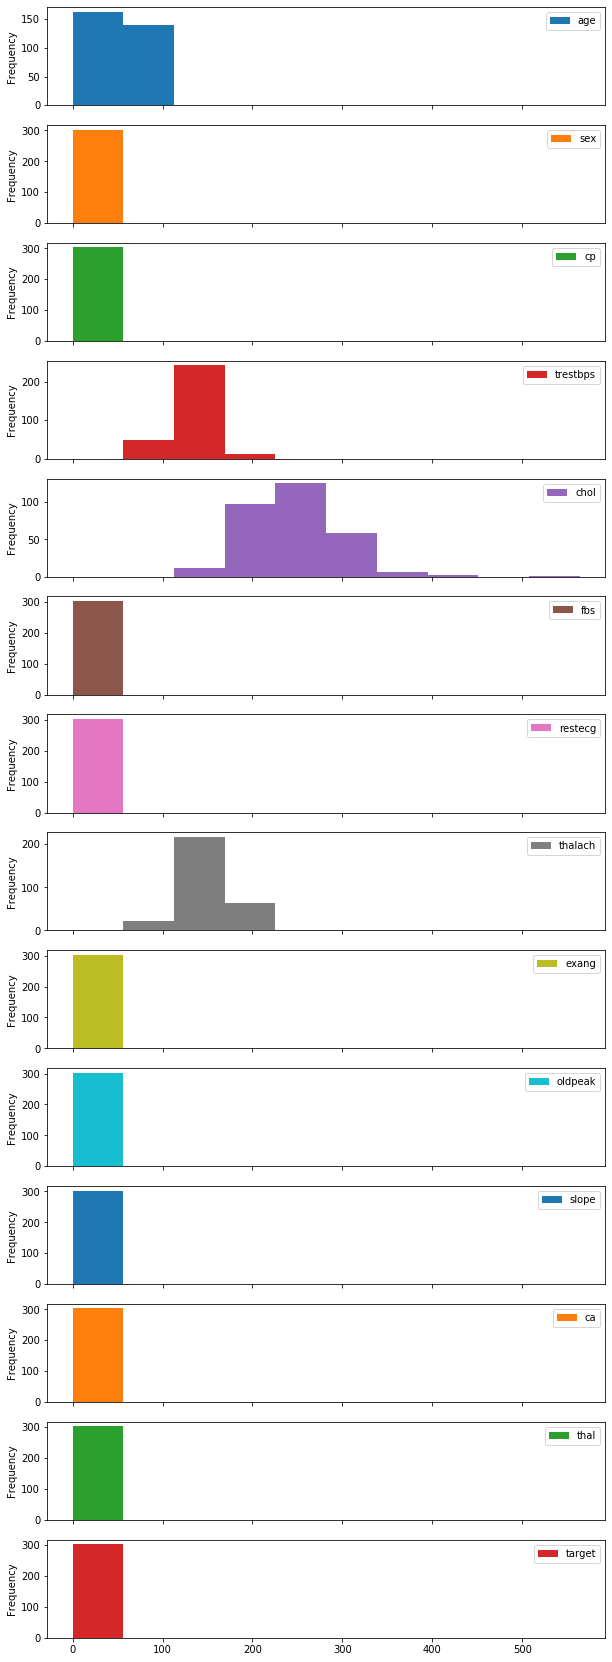

In [37]:
# Subplots
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)
* When plotting something quickly, okay to use the pyplot method 
* When plotting something more advance, use the OO method

In [38]:
over_50 = heart_disease[heart_disease["age"] > 50]
len(over_50)

208

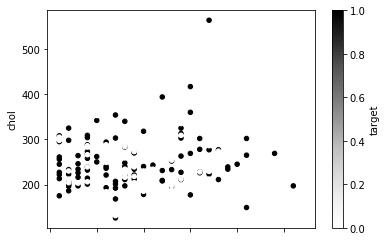

In [39]:
# Pyplot method
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

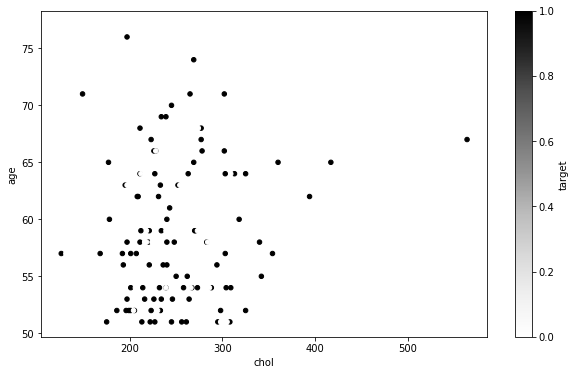

In [40]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind="scatter",
             y="age",
             x="chol",
             c="target",
             ax=ax);

#ax.set_xlim([45, 100]);

In [41]:
over_50.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

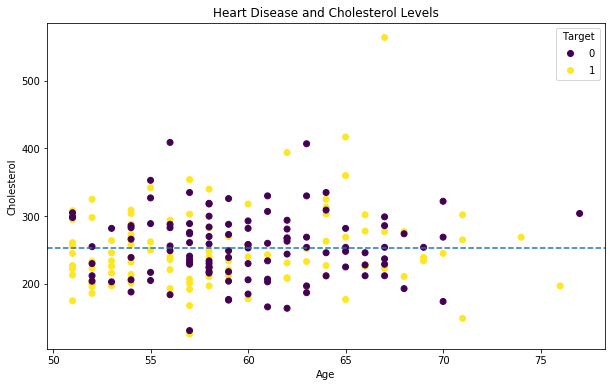

In [42]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"]);

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

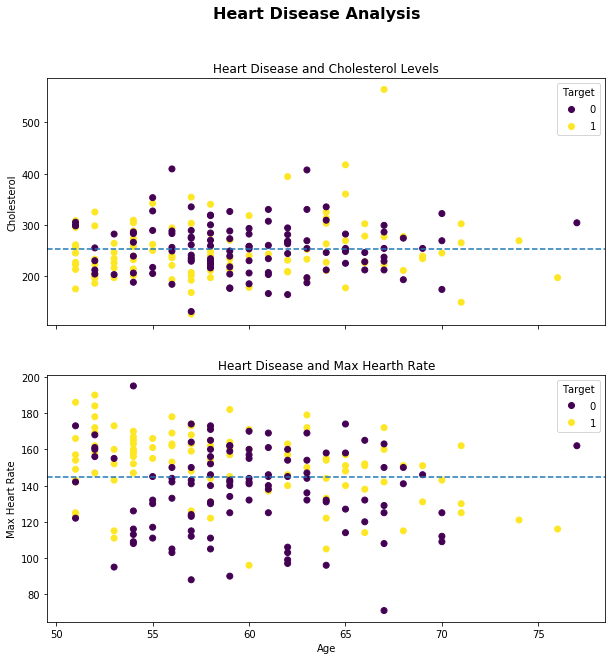

In [43]:
# Subplot of chol, age, thalach

fig, (ax0, ax1) =  plt.subplots(nrows=2,
                                ncols=1,
                                figsize=(10,10),
                                sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
#         xlabel="Age",
        ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--")


# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Hearth Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [46]:
# See the different available stypes
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

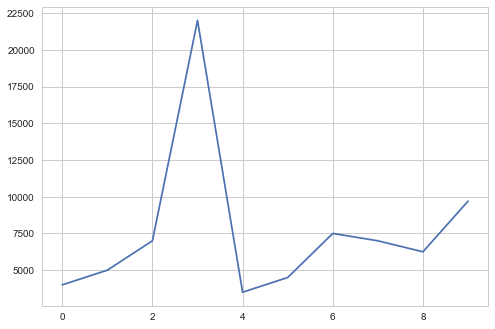

In [52]:
plt.style.use('seaborn-whitegrid')
car_sales["Price"].plot();

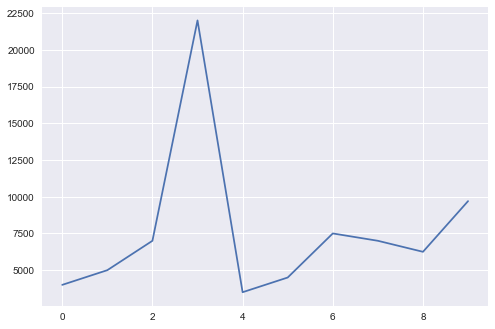

In [53]:
plt.style.use('seaborn')
car_sales["Price"].plot();

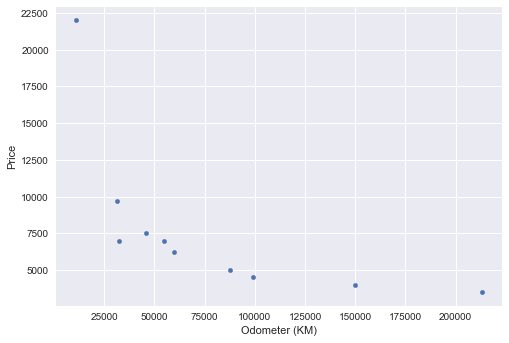

In [55]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

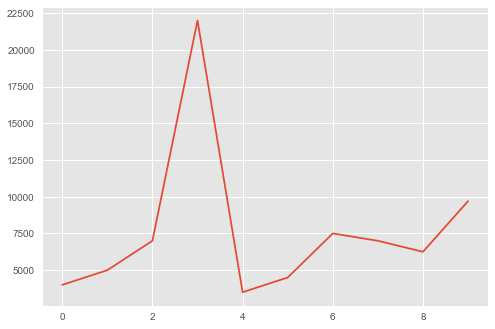

In [56]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [58]:
# Create some data
x = np.random.randn(10, 4)
x

array([[ 2.33062834,  0.14895521, -0.59609535,  1.2287092 ],
       [-1.22320322,  0.2709385 ,  1.56379296,  1.06210456],
       [-1.64080979,  0.07835887, -0.3475522 ,  1.37723868],
       [-1.33046474, -0.94239245,  0.23834545,  0.74452312],
       [-1.60245183, -1.64195865,  0.1208362 , -0.98150034],
       [-0.66566434, -0.60007769,  0.98965728, -1.17281022],
       [-0.28495146,  0.32292926, -0.35523124,  0.91769262],
       [-0.78523596, -0.19997306,  0.33996531,  1.18387622],
       [-0.29012802,  0.37179124, -1.19025044,  1.29067954],
       [-0.6561199 ,  0.52031265, -2.39644621, -0.5062213 ]])

In [59]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,2.330628,0.148955,-0.596095,1.228709
1,-1.223203,0.270938,1.563793,1.062105
2,-1.640810,0.078359,-0.347552,1.377239
3,-1.330465,-0.942392,0.238345,0.744523
4,-1.602452,-1.641959,0.120836,-0.981500
5,-0.665664,-0.600078,0.989657,-1.172810
6,-0.284951,0.322929,-0.355231,0.917693
7,-0.785236,-0.199973,0.339965,1.183876
8,-0.290128,0.371791,-1.190250,1.290680
9,-0.656120,0.520313,-2.396446,-0.506221


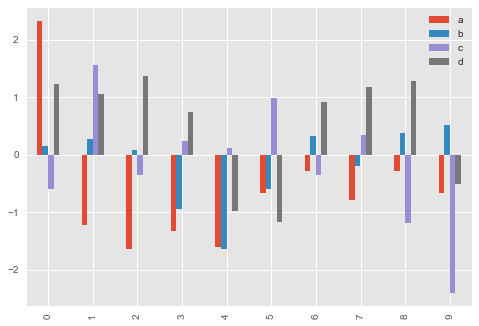

In [61]:
ax = df.plot(kind='bar')
type(ax);

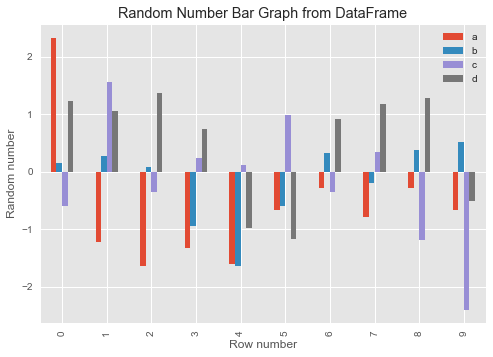

In [63]:
# Customize out plot with the set() method
ax = df.plot(kind="bar")
# Ass some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
      xlabel="Row number",
      ylabel="Random number")
# Visible legend
ax.legend().set_visible(True);

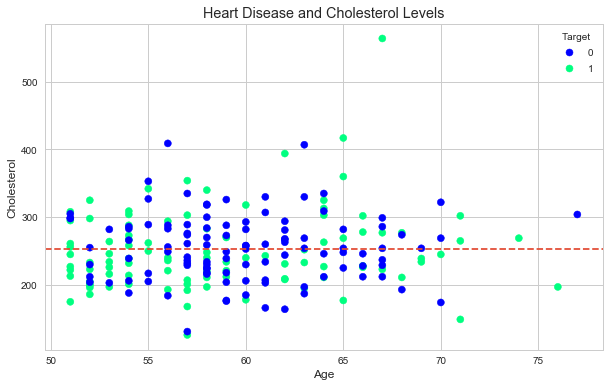

In [75]:
# Set the style
plt.style.use('seaborn-whitegrid')

# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"],
                     cmap="winter") # this changes the color scheme

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

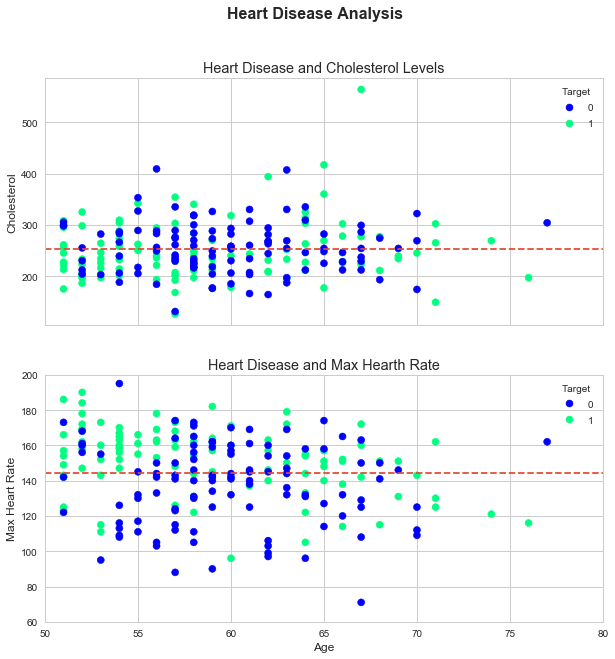

In [84]:
# Customizing the y and x axis limitations

# Subplot of chol, age, thalach
fig, (ax0, ax1) =  plt.subplots(nrows=2,
                                ncols=1,
                                figsize=(10,10),
                                sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
#         xlabel="Age",
        ylabel="Cholesterol")

# Change the x axis limits
ax0.set_xlim([50, 80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--")


# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap="winter")

# Customize ax1
ax1.set(title="Heart Disease and Max Hearth Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Change the x axis limits
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--")

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");